In [191]:
import numpy as np
import pandas as pd

In [192]:
df = pd.read_csv('/Users/saurabhroy/My-Room/Project/Project2_0/spam.csv' , encoding='latin-1')

In [193]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3466,spam,URGENT! We are trying to contact U. Todays dra...,NaN,NaN,NaN
5281,ham,"And how you will do that, princess? :)",NaN,NaN,NaN
4267,ham,Hey so whats the plan this sat?,NaN,NaN,NaN
4981,ham,Slept? I thinkThis time ( &lt;#&gt; pm) is no...,NaN,NaN,NaN
2249,spam,"Thanks for your ringtone order, ref number R83...",NaN,NaN,NaN


In [194]:
df.shape

(5572, 5)

### 1. Data cleaning
### 2. EDA
### 3. Text preprocessing
### 4. Model building
### 5. Evaluation
### 6. Improvement
### 7. Website
### 8. Deploy


1. data Cleaning

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# derop last 3 cols

In [196]:
df.drop(columns=['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'], inplace=True)

In [197]:
df.sample(5)

,v1,v2
1607,ham,Jus telling u dat i'll b leaving 4 shanghai on...
4244,ham,Is toshiba portege m100 gd?
1270,ham,"Sorry chikku, my cell got some problem thts y ..."
3142,ham,Boy; I love u Grl: Hogolo Boy: gold chain kods...
2319,ham,In which place do you want da.


In [198]:
# Renaming the cols using dectionary
df.rename(columns={'v1' : 'target' , 'v2' : 'text'},inplace=True)
df.sample(5)

,target,text
3917,ham,No need to ke qi... ÌÏ too bored izzit y sudde...
2723,ham,"Tunde, how are you doing. This is just wishing..."
2526,ham,Do u noe how 2 send files between 2 computers?
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...
3343,ham,Oh great. I.ll disturb him more so that we can...


In [199]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [200]:
df['target']= encoder.fit_transform(df['target'])

In [201]:
df.head

<bound method NDFrame.head of       target                                               text
0          0  Go until jurong point, crazy.. Available only ...
1          0                      Ok lar... Joking wif u oni...
2          1  Free entry in 2 a wkly comp to win FA Cup fina...
3          0  U dun say so early hor... U c already then say...
4          0  Nah I don't think he goes to usf, he lives aro...
...      ...                                                ...
5567       1  This is the 2nd time we have tried 2 contact u...
5568       0              Will Ì_ b going to esplanade fr home?
5569       0  Pity, * was in mood for that. So...any other s...
5570       0  The guy did some bitching but I acted like i'd...
5571       0                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [202]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [203]:
# check for duplicate values
df.duplicated().sum()

403

In [204]:
# remove duplicate values
df.drop_duplicates(keep='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [205]:
#check the duplicates value
df.duplicated().sum()

403

In [206]:
df.shape

(5572, 2)

2.EDA

In [207]:
df.head

<bound method NDFrame.head of       target                                               text
0          0  Go until jurong point, crazy.. Available only ...
1          0                      Ok lar... Joking wif u oni...
2          1  Free entry in 2 a wkly comp to win FA Cup fina...
3          0  U dun say so early hor... U c already then say...
4          0  Nah I don't think he goes to usf, he lives aro...
...      ...                                                ...
5567       1  This is the 2nd time we have tried 2 contact u...
5568       0              Will Ì_ b going to esplanade fr home?
5569       0  Pity, * was in mood for that. So...any other s...
5570       0  The guy did some bitching but I acted like i'd...
5571       0                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [208]:
df['target'].value_counts()

0    4825
1     747
Name: target, dtype: int64

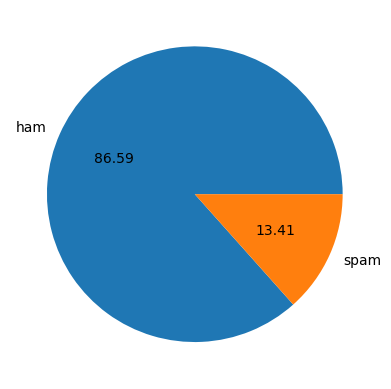

In [209]:
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

(Data is imbalanced)

nltk = natural language tool kit

In [210]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/saurabhroy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [211]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [212]:
# num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [213]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [214]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.695621,1.970747
std,59.690841,13.742587,1.417778
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,28.000000


In [215]:
#ham messages describe
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.271917,1.808705
std,58.016023,13.988885,1.328227
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [216]:
# for spam 
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.017403
std,29.183082,6.867007,1.528449
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [217]:
# histogram plot
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

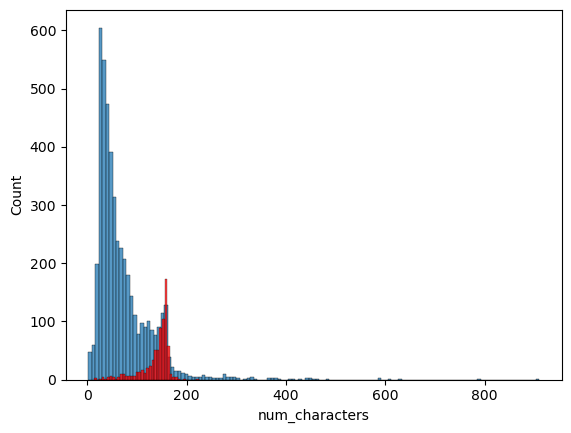

In [218]:
sns.histplot(df[df['target'] == 0]['num_characters']) #for ham characters
sns.histplot(df[df['target'] == 1]['num_characters'],color='red') #for spam characters

<Axes: xlabel='num_words', ylabel='Count'>

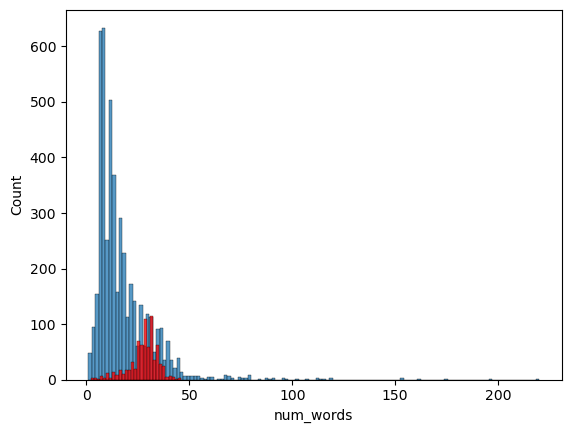

In [219]:
sns.histplot(df[df['target'] == 0]['num_words']) #for ham words
sns.histplot(df[df['target'] == 1]['num_words'],color='red') # for spam words

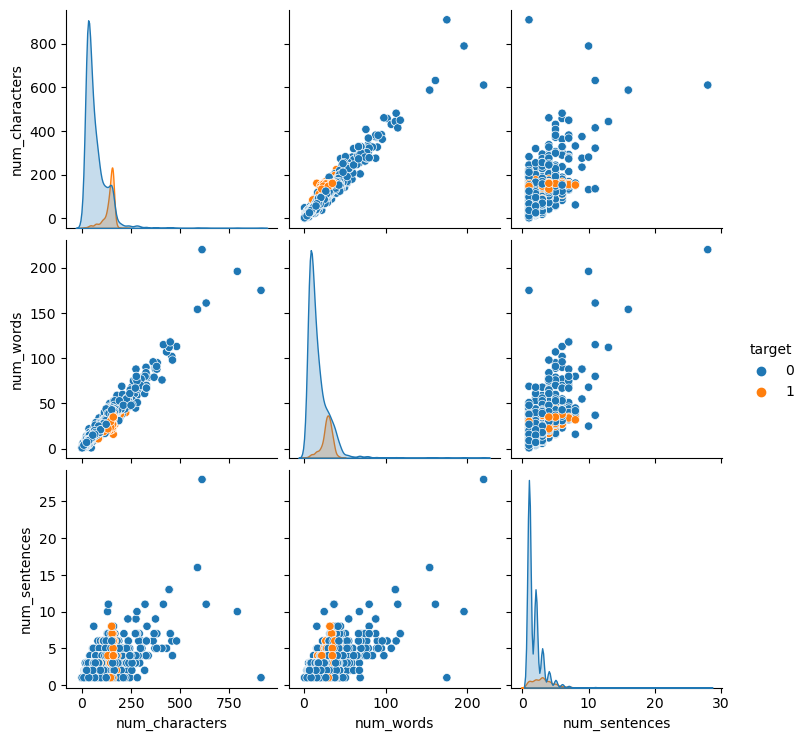

In [220]:
sns.pairplot(df,hue='target')

/var/folders/db/rx33c2k10rx55psyz9k_dmwc0000gn/T/ipykernel_4774/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

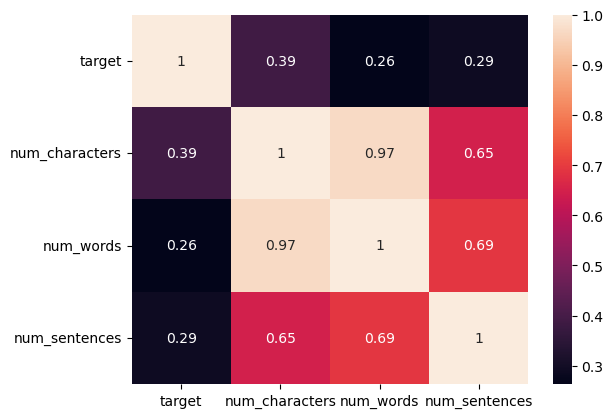

In [221]:
sns.heatmap(df.corr(),annot=True)

3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

### Lower case

In [222]:
def transform_text(text):
    text = text.lower()
    return text

In [223]:
transform_text('Hi how Are you')

'hi how are you'

### Tokenization

In [224]:
from sklearn.naive_bayes import MultinomialNB
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer  # Import the PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []

    for i in text:
        if i.isalnum():
            y.append(i)
        
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    
    ps = PorterStemmer()  # Create an instance of PorterStemmer
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/saurabhroy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saurabhroy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [225]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')
# result = transform_text('Hi how Are you Nitish?')
# print(result)


'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [226]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

### Removing stop words and punctuation

In [227]:
import nltk
nltk.download('stopwords')  # Download the stopwords data (only required once)

from nltk.corpus import stopwords

# Get the list of English stopwords
english_stopwords = stopwords.words('english')

# Print the stopwords
print(english_stopwords)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saurabhroy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [228]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## Stemming

In [229]:

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [135]:
df['transformed_text'] = df['text'].apply(transform_text)

In [136]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Word cloud
### main word deffine like in big word 

In [137]:

from wordcloud import WordCloud
wc = WordCloud (width=500,height=500,min_font_size=10,background_color='white')

In [138]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

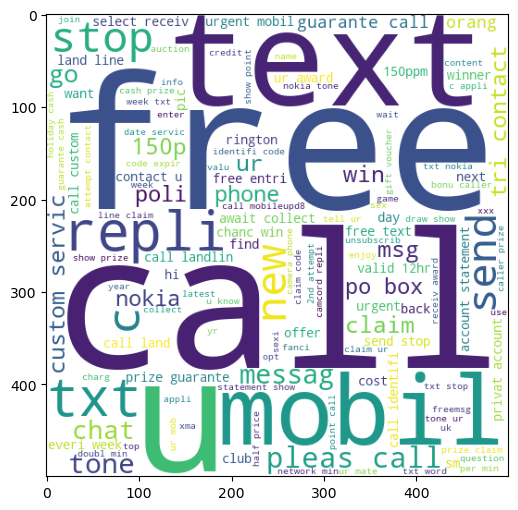

In [139]:
plt.figure(figsize=(15,6)) #for more size increace
plt.imshow(spam_wc)

In [140]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

#### ham

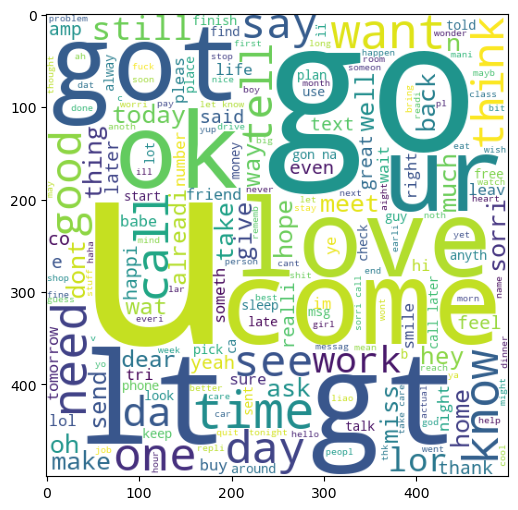

In [141]:
plt.figure(figsize=(15,6)) #for more size increace
plt.imshow(ham_wc)

In [142]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [143]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [144]:
len(spam_corpus)

11490

### Display the top 30 spam words

/Users/saurabhroy/anaconda3/envs/project-3-8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


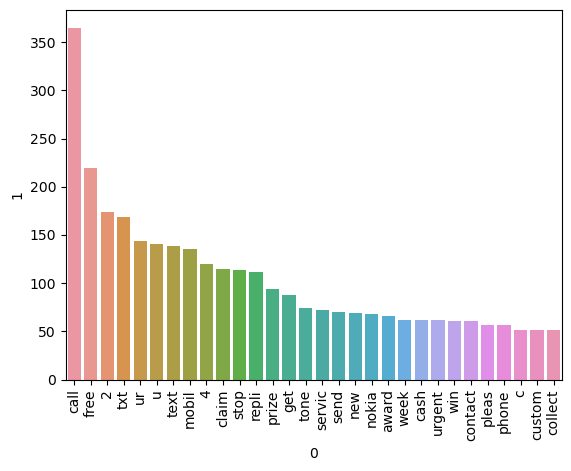

In [145]:

from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


### For Top 30 ham words

In [146]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [147]:
len(ham_corpus)

38205

/Users/saurabhroy/anaconda3/envs/project-3-8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


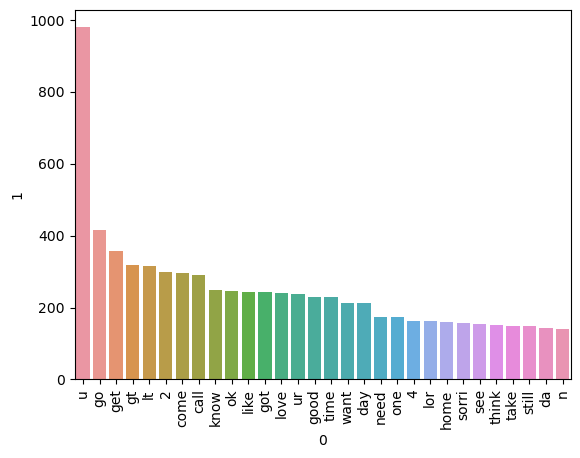

In [148]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Build
### using Naïve Bayes Classifier Algorithm becouse it's good with text base

#### text to vector convert 
##### 1.bag of words
##### 2.tfidfVectorizer

In [149]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [150]:
X = cv.fit_transform(df['transformed_text']).toarray()


In [151]:
X.shape
#sms,words

(5572, 6708)

In [152]:
y = df['target'].values

In [153]:

y

array([0, 0, 1, ..., 0, 0, 0])

In [154]:

from sklearn.model_selection import train_test_split


In [155]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [156]:

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [157]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


##### GaussianNB

In [158]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
#acuracy and presion score

0.873542600896861
[[843 114]
 [ 27 131]]
0.5346938775510204


##### MultinomialNB

In [159]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
#acuracy and presion score

0.9713004484304932
[[942  15]
 [ 17 141]]
0.9038461538461539


##### BernoulliNB

In [160]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
#best acuracy and presion score

0.9695067264573991
[[956   1]
 [ 33 125]]
0.9920634920634921


#### 2.TFidfVectorizer

In [161]:
from sklearn.feature_extraction.text import TfidfVectorizer 
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [162]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [163]:
X.shape

(5572, 6708)

In [164]:
y = df['target'].values

In [165]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [168]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [169]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

##### GaussianNB

In [170]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
#acuracy and presion score

0.8690582959641255
[[844 113]
 [ 33 125]]
0.5252100840336135


##### MultinomialNB

In [171]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
#best acuracy and presion score

0.957847533632287
[[957   0]
 [ 47 111]]
1.0


##### BernoulliNB

In [172]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
#acuracy and presion score

0.9695067264573991
[[956   1]
 [ 33 125]]
0.9920634920634921


#### tfidf --> MNB

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [174]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [175]:
#Dic
clfs = {
    'SVC' : svc,
    'KN'  : knc,
    'NB'  : mnb,
    'DT'  : dtc,
    'LR'  : lrc,
    'RF'  : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb

}

In [176]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [177]:
train_classifier(svc,X_train,y_train,X_test,y_test)  # svc --> support vector classifier

(0.9659192825112107, 0.9761904761904762)

In [178]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9659192825112107
Precision -  0.9761904761904762
For  KN
Accuracy -  0.8986547085201794
Precision -  1.0
For  NB
Accuracy -  0.957847533632287
Precision -  1.0
For  DT
Accuracy -  0.9237668161434978
Precision -  0.8543689320388349
For  LR
Accuracy -  0.9443946188340807
Precision -  0.9444444444444444
For  RF
Accuracy -  0.9641255605381166
Precision -  0.9836065573770492
For  AdaBoost
Accuracy -  0.9533632286995516
Precision -  0.9344262295081968
For  BgC
Accuracy -  0.9587443946188341
Precision -  0.9242424242424242
For  ETC
Accuracy -  0.9739910313901345
Precision -  1.0
For  GBDT
Accuracy -  0.9426008968609866
Precision -  0.9607843137254902
For  xgb
Accuracy -  0.9650224215246637
Precision -  0.976


In [179]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [180]:

performance_df

,Algorithm,Accuracy,Precision
1,KN,0.898655,1.000000
2,NB,0.957848,1.000000
8,ETC,0.973991,1.000000
5,RF,0.964126,0.983607
0,SVC,0.965919,0.976190
10,xgb,0.965022,0.976000
9,GBDT,0.942601,0.960784
4,LR,0.944395,0.944444
6,AdaBoost,0.953363,0.934426
7,BgC,0.958744,0.924242


In [181]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.catplot(x = 'Algorithm', y='value',hue = 'variable',data = performance_df1, jind='bar',height=5)
# plt.ylim(0.5,1.0)
# plt.xticks(rotation='vertical')
# plt.show()



#### Performance Improve

In [182]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [183]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [184]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [185]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9713004484304932
Precision 1.0


In [186]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [187]:
from sklearn.ensemble import StackingClassifier

In [188]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [189]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.97847533632287
Precision 0.971830985915493


In [190]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))